In [43]:
import pandas as pd
import sklearn
from sklearn.cluster import MeanShift
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

from statistics import median
from scipy.spatial import distance

def get_distance_from_centroid(datum, kmeans):
    cluster = kmeans.predict([datum])
    centroid = kmeans.cluster_centers_[cluster]
    dist = distance.euclidean(centroid[0], datum) 
    return dist

def get_median_distance_from_centroids(data_points, kmeans):
    distances = []
    for d in data_points:
        distances.append(get_distance_from_centroid(d, kmeans))
    return median(distances)

def get_anomalies(data_points, kmeans, threshold=2):
    median_dist = get_median_distance_from_centroids(data_points, kmeans)
    anomalies = []
    for k,d in enumerate(data_points):
        dist = get_distance_from_centroid(d, kmeans)
        if dist > median_dist*threshold:
            anomalies.append(k)
    return anomalies

In [44]:
# df = pd.read_excel("data/pivottablefull.xlsx")
ewdf = pd.read_excel("data/Demographic-data-for-new-parliamentary-constituencies-November-2023.xlsx", sheet_name="EW_table", skiprows=5)
scotdf = pd.read_excel("data/Demographic-data-for-new-parliamentary-constituencies-November-2023.xlsx", sheet_name="Scotland_table", skiprows=6)

In [45]:
scotdf.columns
scotdf = scotdf.rename({
    "Aged 16-24":"Aged 16 to 24 years",
    "Aged 25 to 34":"Aged 25 to 34 years",
    "Aged 35 to 49":"Aged 35 to 49 years",
    "Aged 50 to 64":"Aged 50 to 64 years"
}, axis=1).copy()

In [46]:
df = pd.concat([ewdf,scotdf],ignore_index=True)

In [47]:
df[560:580]

,Unnamed: 0,ONS code,New constituency name,Total population,Number of households,Unnamed: 5,Aged 15 years and under,Aged 16 to 24 years,Aged 25 to 34 years,Aged 35 to 49 years,...,Sikh,Other religion,Not answered,Unnamed: 37,Owned outright,Owned with a mortgage or loan,Private rented,Social rented,Other tenure,Unnamed: 4
560,NaN,E14001591,Witney,97260.0,40272.0,NaN,0.186109,0.087343,0.129570,0.193810,...,0.000699,0.005059,0.057148,NaN,0.346494,0.306640,0.185116,0.138210,0.023540,NaN
561,NaN,E14001592,Woking,103943.0,41438.0,NaN,0.201657,0.086489,0.132004,0.228104,...,0.002742,0.004830,0.058051,NaN,0.319779,0.344611,0.210869,0.115643,0.009098,NaN
562,NaN,E14001593,Wokingham,98225.0,39179.0,NaN,0.206279,0.081852,0.106550,0.221143,...,0.011148,0.004194,0.058173,NaN,0.367544,0.387223,0.140126,0.083284,0.021823,NaN
563,NaN,E14001594,Wolverhampton North East,104528.0,42285.0,NaN,0.213244,0.103408,0.137045,0.188256,...,0.075209,0.006085,0.056754,NaN,0.304623,0.259903,0.150550,0.277947,0.006976,NaN
564,NaN,E14001595,Wolverhampton South East,119746.0,46651.0,NaN,0.232542,0.105665,0.143796,0.202679,...,0.116070,0.013253,0.052636,NaN,0.253778,0.239823,0.185527,0.313112,0.007760,NaN
565,NaN,E14001596,Wolverhampton West,112655.0,45172.0,NaN,0.192719,0.105791,0.130237,0.203265,...,0.143811,0.013430,0.052789,NaN,0.334743,0.259121,0.221110,0.176459,0.008567,NaN
566,NaN,E14001597,Worcester,103872.0,44724.0,NaN,0.175841,0.120937,0.140317,0.192939,...,0.001617,0.004342,0.060989,NaN,0.320186,0.293847,0.212280,0.162530,0.011157,NaN
567,NaN,E14001598,Worsley and Eccles,106630.0,46032.0,NaN,0.192891,0.092150,0.151336,0.199325,...,0.002166,0.002757,0.045776,NaN,0.299379,0.328424,0.167058,0.196689,0.008451,NaN
568,NaN,E14001599,Worthing West,99730.0,45327.0,NaN,0.157716,0.078933,0.112795,0.179184,...,0.000953,0.006347,0.060162,NaN,0.404130,0.287400,0.199616,0.100470,0.008384,NaN
569,NaN,W07000111,Wrexham,99079.0,42305.0,NaN,0.181754,0.093390,0.124749,0.192230,...,0.000696,0.003714,0.065149,NaN,0.348871,0.283111,0.165631,0.196076,0.006311,NaN


In [48]:
df = df.drop([0,1,577,578]).copy()

In [105]:
df = pd.concat([ewdf,scotdf],ignore_index=True)
df = df.drop([0,1,577,578]).copy()



drop_cols = ["Unnamed: 0", "ONS code", "New constituency name", "Unnamed: 5", 'Unnamed: 12', 'Unnamed: 20', 'Unnamed: 27','Unnamed: 37']
unnamed_cols = [col for col in df.columns if "Unnamed:" in col]
for col in unnamed_cols:
    drop_cols.append(col)
print(drop_cols)
xdf = df.drop(drop_cols,axis=1)
xdf = xdf.dropna(axis=1).copy()
# xdf.fillna(xdf.mean(), inplace=True)
X = xdf.values
scaler = MinMaxScaler()
X = scaler.fit_transform(X)




km = KMeans(random_state=6)
km.fit(X)



anomalies = get_anomalies(X, km)
cluster_labels = km.labels_
cluster_labels[anomalies] = 999
df["Cluster"] = cluster_labels
df["Cluster"].value_counts()

['Unnamed: 0', 'ONS code', 'New constituency name', 'Unnamed: 5', 'Unnamed: 12', 'Unnamed: 20', 'Unnamed: 27', 'Unnamed: 37', 'Unnamed: 0', 'Unnamed: 5', 'Unnamed: 12', 'Unnamed: 20', 'Unnamed: 27', 'Unnamed: 37', 'Unnamed: 4']


Cluster
6      206
2      100
0       99
999     64
5       59
7       40
3       33
4       16
1       15
Name: count, dtype: int64

In [89]:



# ms = MeanShift()
# ms.fit(X)


KMeans(random_state=6)

In [96]:
# plt.scatter(X[:,1], X[:,6], c=ms.labels_)
# plt.legend()
# plt.show()
km.labels_

array([  3,   5,   3,   5,   3,   3,   1,   3,   5,   5,   5,   3,   1,
       999,   3,   3,   1,   5,   5,   3,   0, 999,   3, 999,   5, 999,
       999,   1,   1,   5,   5,   3,   5,   5, 999, 999, 999,   5, 999,
         0,   2,   1,   2,   2,   1,   3,   3,   3,   3,   1,   3,   5,
         2,   3,   3,   3,   5,   0,   5, 999,   5,   2,   3,   1,   7,
         7,   7,   3,   3,   3,   1,   1,   6, 999, 999,   7,   5,   5,
         7,   1,   5,   3,   5,   3,   5,   5,   5,   3,   5,   3,   1,
         3,   3,   3,   4,   3,   0,   0,   3,   0,   5,   3,   5,   1,
         1,   3,   1,   5,   3,   5,   4,   3,   3,   3,   1,   3,   1,
         5,   3,   5,   3, 999, 999, 999,   1, 999,   1,   1,   7,   3,
         3,   5,   7,   5,   0,   3,   7,   5,   5,   5,   7,   7,   3,
         7,   3,   5,   7,   1,   5,   5,   5,   3,   3,   3,   3,   3,
         5, 999,   5,   1, 999,   7,   7,   5,   3,   3, 999,   1,   3,
         3,   5,   3,   3,   3,   5,   3,   5,   3, 999,   5,   

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


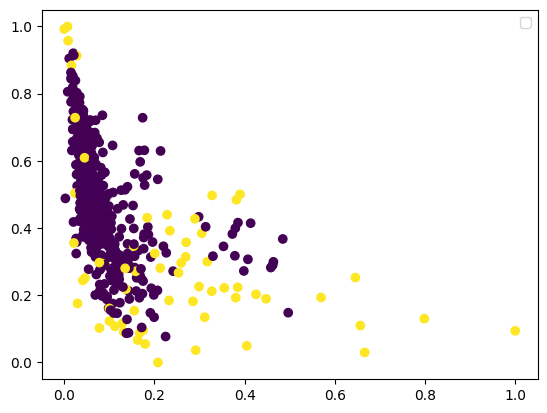

In [107]:
plt.scatter(X[:,2], X[:,6], c=km.labels_)
plt.legend()
plt.show()

In [108]:
anomalies = get_anomalies(X, km)
cluster_labels = km.labels_
cluster_labels[anomalies] = 999
df["Cluster"] = cluster_labels
df["Cluster"].value_counts()

Cluster
6      206
2      100
0       99
999     64
5       59
7       40
3       33
4       16
1       15
Name: count, dtype: int64

In [111]:
df.tail(25)

,Unnamed: 0,ONS code,New constituency name,Total population,Number of households,Unnamed: 5,Aged 15 years and under,Aged 16 to 24 years,Aged 25 to 34 years,Aged 35 to 49 years,...,Other religion,Not answered,Unnamed: 37,Owned outright,Owned with a mortgage or loan,Private rented,Social rented,Other tenure,Unnamed: 4,Cluster
611,NaN,S14000088,Glasgow South West,99400.0,NaN,NaN,0.176104,0.097147,0.193812,0.202570,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,999
612,NaN,S14000089,Glasgow West,103000.0,NaN,NaN,0.148323,0.110071,0.215157,0.205321,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
613,NaN,S14000090,Glenrothes and Mid Fife,93900.0,NaN,NaN,0.184875,0.092603,0.121611,0.174613,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
614,NaN,S14000091,Gordon and Buchan,92800.0,NaN,NaN,0.188463,0.084912,0.103282,0.204290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
615,NaN,S14000092,Hamilton and Clyde Valley,96600.0,NaN,NaN,0.171994,0.095790,0.119122,0.192749,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
616,NaN,S14000093,Inverclyde and Renfrewshire West,92600.0,NaN,NaN,0.167823,0.093290,0.115862,0.179136,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
617,NaN,S14000094,"Inverness, Skye and West Ross-shire",103000.0,NaN,NaN,0.165426,0.092124,0.118658,0.195038,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
618,NaN,S14000040,Kilmarnock and Loudoun,97200.0,NaN,NaN,0.170329,0.094324,0.122673,0.181520,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
619,NaN,S14000095,Livingston,104000.0,NaN,NaN,0.185048,0.105644,0.126821,0.199290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
620,NaN,S14000096,Lothian East,96700.0,NaN,NaN,0.185903,0.086982,0.108430,0.186513,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6


In [112]:
df = df.drop(unnamed_cols, axis=1)

In [113]:
df.to_csv("outputs/clusteredconstituencies.csv",index=False)